In [1]:
# Sample API
import flowx
import simulation
import numpy

In [2]:
# Define grid parameters
nx, ny = 40, 40

xmin, xmax = 0.0, 2.0*numpy.pi
ymin, ymax = 0.0, 2.0*numpy.pi

# Define cell-centered variable names
center_vars   = ['pres', 'delp', 'divv', 'asol', 'eror']
face_vars     = ['velc', 'hvar', 'asol', 'eror']

ins_vars      = ['velc', 'hvar', 'divv', 'pres', 'delp']
poisson_vars  = ['delp', 'divv']

scalar_info     = dict(tmax =  2, dt = 0.001, Re = 1.0)
simulation_info = dict(time_stepping = 'euler', 
                       poisson_solver = 'direct', 
                       maxiter = 3000, 
                       pressure_correct = True)

# Define boundary conditions for variable pressure and velocity [left, right, bottom, top]
bc_type_center = dict(delp = ['neumann', 'neumann', 'neumann', 'neumann'])
bc_val_center  = dict(delp = [0.0, 0.0, 0.0, 0.0])

bc_type_facex = dict(velc = ['dirichlet', 'dirichlet', 'dirichlet', 'dirichlet'])
bc_val_facex  = dict(velc = [0.0, 0.0, 0.0, 0.0])

bc_type_facey = dict(velc = ['dirichlet', 'dirichlet', 'dirichlet', 'dirichlet'])
bc_val_facey  = dict(velc = [0.0, 0.0, 0.0, 0.0])

gridc, gridx, gridy, scalars, particles = flowx.domain.Domain(nx, ny, xmin, xmax, ymin, ymax,
                                              center_vars, face_vars, scalar_info,
                                              bc_type_center=bc_type_center, bc_val_center=bc_val_center,
                                              bc_type_facex=bc_type_facex, bc_val_facex=bc_val_facex,
                                              bc_type_facey=bc_type_facey, bc_val_facey=bc_val_facey)

domain_data_struct = [gridc, gridx, gridy, scalars, particles]

poisson = flowx.poisson.Poisson(gridc, poisson_vars, simulation_info)

imbound = flowx.imbound.ImBound()

ins = flowx.ins.IncompNS(poisson, imbound, domain_data_struct, ins_vars, simulation_info)

In [3]:
simulation.update_bc_val(gridx, gridy, 'velc', scalars.to)
simulation.get_initial(gridc, gridx, gridy, 'velc', 'pres')

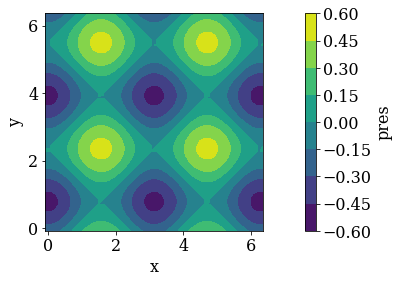

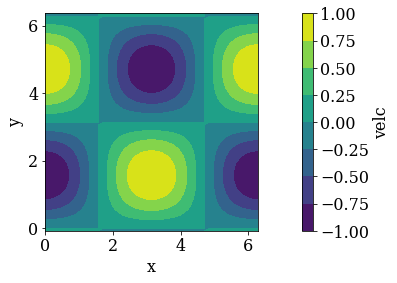

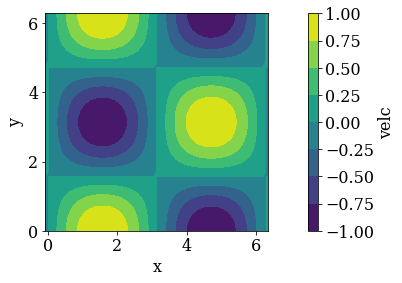

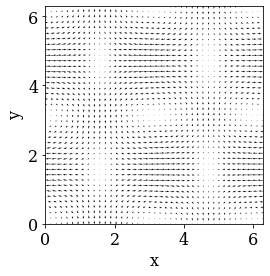

In [4]:
flowx.io.plot_contour(gridc, 'pres')
flowx.io.plot_contour(gridx, 'velc')
flowx.io.plot_contour(gridy, 'velc')
flowx.io.plot_vector(gridx, gridy, 'velc')

In [5]:
while scalars.time <= scalars.tmax:
    
    # Update the time-dependent boundary condition value
    simulation.update_bc_val(gridx, gridy, 'velc', scalars.time)
    
    ins.advance()
    
    # Display stats
    if scalars.nstep % 10 == 0:
        flowx.io.display_stats(scalars)   
    
    scalars.advance()

------------ Time = 0.0 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.618214117480217e-13
Total poisson time : 0.002736806869506836
Total INS time : 0.0033850669860839844
Max, Min, U   : 0.9969173337331281, -0.996917333733128
Max, Min, V   : 0.996917333733128, -0.9969173337331281
Max, Min, P   : 1.300154171287978, -1.8176787140482105
Max, Min, DIV : 7.771561172376096e-16, -8.881784197001252e-16
Qin, Qout     : 0.0, 0.0


------------ Time = 0.010000000000000002 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.1555714851279907e-13
Total poisson time : 0.0024559497833251953
Total INS time : 0.002779722213745117
Max, Min, U   : 0.9771770479217199, -0.9771770479217198
Max, Min, V   : 0.9771770479217198, -0.9771770479217199
Max, Min, P   : -2.6517459736459346, -3.676777344305894
Max, Min, DIV : 7.771561172376096e-16, -8.881784197001252e-16
Qin, Qout     : 0.0, 0.0


------------ Time = 0.02000000000000001 ---------------
N

------------ Time = 0.24000000000000019 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.3968245236962822e-13
Total poisson time : 0.0023779869079589844
Total INS time : 0.0026962757110595703
Max, Min, U   : 0.6168758891177192, -0.6168758891177192
Max, Min, V   : 0.6168758891177192, -0.6168758891177192
Max, Min, P   : 6.870690351311978, 6.414967424568447
Max, Min, DIV : 6.938893903907228e-16, -6.661338147750939e-16
Qin, Qout     : 0.0, 0.0


------------ Time = 0.25000000000000017 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.1773757117669144e-13
Total poisson time : 0.002348184585571289
Total INS time : 0.002660036087036133
Max, Min, U   : 0.6046609281081134, -0.6046609281081134
Max, Min, V   : 0.6046609281081134, -0.6046609281081134
Max, Min, P   : 5.548553049659025, 5.107626987706748
Max, Min, DIV : 7.216449660063518e-16, -6.106226635438361e-16
Qin, Qout     : 0.0, 0.0


------------ Time = 0.2600000000000002 -----

------------ Time = 0.46000000000000035 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.9447941241456455e-14
Total poisson time : 0.002365589141845703
Total INS time : 0.0026891231536865234
Max, Min, U   : 0.3972905398798565, -0.3972905398798565
Max, Min, V   : 0.3972905398798565, -0.3972905398798565
Max, Min, P   : 3.868565674813177, 3.6328192911521238
Max, Min, DIV : 3.3306690738754696e-16, -3.885780586188048e-16
Qin, Qout     : 0.0, 0.0


------------ Time = 0.47000000000000036 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.832354446816866e-13
Total poisson time : 0.0024123191833496094
Total INS time : 0.002741098403930664
Max, Min, U   : 0.3894236601075599, -0.38942366010755985
Max, Min, V   : 0.38942366010755985, -0.3894236601075599
Max, Min, P   : 3.143047710298283, 2.9103897432477996
Max, Min, DIV : 3.608224830031759e-16, -3.608224830031759e-16
Qin, Qout     : 0.0, 0.0


------------ Time = 0.48000000000000037 

------------ Time = 0.6900000000000005 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.2707796080856414e-13
Total poisson time : 0.002562284469604492
Total INS time : 0.002887248992919922
Max, Min, U   : 0.25080302034077046, -0.25080302034077046
Max, Min, V   : 0.25080302034077046, -0.25080302034077046
Max, Min, P   : 9.342118259340555, 9.153834766074015
Max, Min, DIV : 1.942890293094024e-16, -2.3245294578089215e-16
Qin, Qout     : 0.0, 0.0


------------ Time = 0.7000000000000005 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.328624019953838e-16
Total poisson time : 0.0023348331451416016
Total INS time : 0.00266265869140625
Max, Min, U   : 0.2458367877993504, -0.24583678779935036
Max, Min, V   : 0.24583678779935036, -0.2458367877993504
Max, Min, P   : 9.053143240265028, 8.866096422514294
Max, Min, DIV : 1.942890293094024e-16, -1.942890293094024e-16
Qin, Qout     : 0.0, 0.0


------------ Time = 0.7100000000000005 ---

------------ Time = 0.9200000000000007 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.5418398396487736e-15
Total poisson time : 0.002340078353881836
Total INS time : 0.0026586055755615234
Max, Min, U   : 0.15832784498486926, -0.15832784498486924
Max, Min, V   : 0.15832784498486924, -0.15832784498486926
Max, Min, P   : 8.244663580283564, 8.075389800154754
Max, Min, DIV : 1.8041124150158794e-16, -1.5959455978986625e-16
Qin, Qout     : 0.0, 0.0


------------ Time = 0.9300000000000007 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.0305156283615749e-13
Total poisson time : 0.002390146255493164
Total INS time : 0.0027043819427490234
Max, Min, U   : 0.15519274360168644, -0.15519274360168642
Max, Min, V   : 0.15519274360168642, -0.15519274360168644
Max, Min, P   : 8.523795863604613, 8.355017462564444
Max, Min, DIV : 1.734723475976807e-16, -1.8041124150158794e-16
Qin, Qout     : 0.0, 0.0


------------ Time = 0.9400000000000

------------ Time = 1.1499999999999841 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.575646539504347e-14
Total poisson time : 0.0025086402893066406
Total INS time : 0.002820730209350586
Max, Min, U   : 0.09994977916730703, -0.09994977916730702
Max, Min, V   : 0.09994977916730702, -0.09994977916730703
Max, Min, P   : 7.545636257333432, 7.383992296861493
Max, Min, DIV : 9.020562075079397e-17, -9.020562075079397e-17
Qin, Qout     : 0.0, 0.0


------------ Time = 1.159999999999983 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.266315777170024e-14
Total poisson time : 0.002328634262084961
Total INS time : 0.0026378631591796875
Max, Min, U   : 0.09797064093709773, -0.09797064093709772
Max, Min, V   : 0.09797064093709772, -0.09797064093709773
Max, Min, P   : 7.291527577864577, 7.130083192569822
Max, Min, DIV : 9.020562075079397e-17, -9.020562075079397e-17
Qin, Qout     : 0.0, 0.0


------------ Time = 1.169999999999982 ---

------------ Time = 1.3899999999999577 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.769642251291383e-14
Total poisson time : 0.0023355484008789062
Total INS time : 0.0026459693908691406
Max, Min, U   : 0.061848449614535, -0.06184844961453499
Max, Min, V   : 0.061848449614535, -0.061848449614535
Max, Min, P   : 6.418226449029107, 6.2597430268394065
Max, Min, DIV : 5.551115123125783e-17, -4.85722573273506e-17
Qin, Qout     : 0.0, 0.0


------------ Time = 1.3999999999999566 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.706181643506319e-14
Total poisson time : 0.0023572444915771484
Total INS time : 0.002667665481567383
Max, Min, U   : 0.06062453528743953, -0.06062453528743953
Max, Min, V   : 0.060624535287439524, -0.06062453528743953
Max, Min, P   : 6.373532606896542, 6.215126896095603
Max, Min, DIV : 4.85722573273506e-17, -4.5102810375396984e-17
Qin, Qout     : 0.0, 0.0


------------ Time = 1.4099999999999555 -----

------------ Time = 1.6299999999999313 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.739116299618128e-15
Total poisson time : 0.0024030208587646484
Total INS time : 0.0027227401733398438
Max, Min, U   : 0.038283272498668156, -0.03828327249866815
Max, Min, V   : 0.038283272498668156, -0.03828327249866815
Max, Min, P   : 6.296290063954285, 6.13904101560072
Max, Min, DIV : 3.8163916471489756e-17, -3.9898639947466563e-17
Qin, Qout     : 0.0, 0.0


------------ Time = 1.6399999999999302 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.8206351468576276e-15
Total poisson time : 0.0023610591888427734
Total INS time : 0.0026738643646240234
Max, Min, U   : 0.03752576352991595, -0.03752576352991594
Max, Min, V   : 0.03752576352991595, -0.03752576352991595
Max, Min, P   : 6.40596485504831, 6.248746310798576
Max, Min, DIV : 4.336808689942018e-17, -4.336808689942018e-17
Qin, Qout     : 0.0, 0.0


------------ Time = 1.6499999999999

------------ Time = 1.859999999999906 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.142646919065959e-15
Total poisson time : 0.0024056434631347656
Total INS time : 0.002724170684814453
Max, Min, U   : 0.024176367922811023, -0.02417636792281102
Max, Min, V   : 0.024176367922811016, -0.02417636792281102
Max, Min, P   : 6.861625094027026, 6.704850047250553
Max, Min, DIV : 2.2551405187698492e-17, -2.2551405187698492e-17
Qin, Qout     : 0.0, 0.0


------------ Time = 1.8699999999999048 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.029295628018782e-15
Total poisson time : 0.002323627471923828
Total INS time : 0.002633810043334961
Max, Min, U   : 0.02369804726595356, -0.023698047265953554
Max, Min, V   : 0.023698047265953558, -0.023698047265953558
Max, Min, P   : 6.932963242081179, 6.776200775366364
Max, Min, DIV : 2.2551405187698492e-17, -2.2551405187698492e-17
Qin, Qout     : 0.0, 0.0


------------ Time = 1.87999999999

In [6]:
simulation.get_analytical(gridc, gridx, gridy, 'asol', scalars.time)

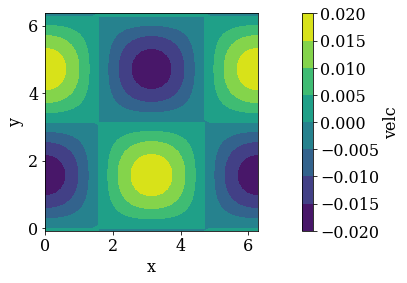

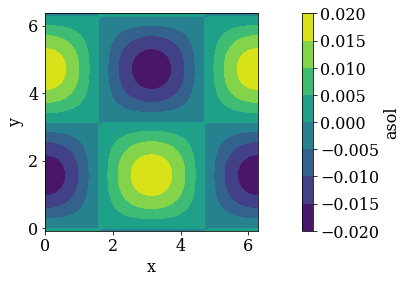

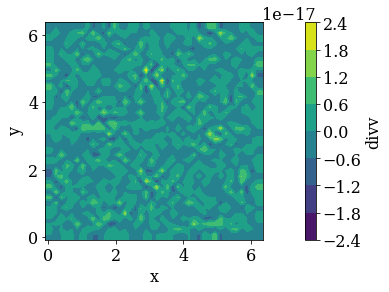

In [7]:
flowx.io.plot_contour(gridx, 'velc')
flowx.io.plot_contour(gridx, 'asol')
flowx.io.plot_contour(gridc, 'divv')

In [8]:
gridx.get_error('eror','velc','asol')
gridy.get_error('eror','velc','asol')

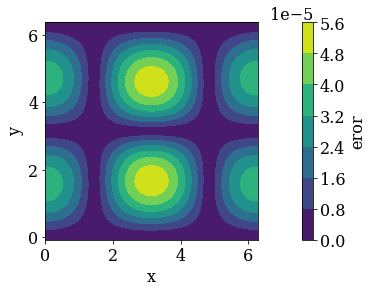

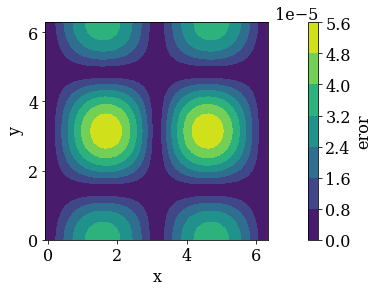

In [9]:
flowx.io.plot_contour(gridx, 'eror')
flowx.io.plot_contour(gridy, 'eror')